# Test: Outputs of Seurat standard pipeline

* Tested pipeline:

`NormalizeData() %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA() %>% RunUMAP(dims = 1:30)`

* All parameters that weren't mentioned above were kept defaults.

* Run the pipeline on two independent devices (`DESKTOP-5EA6KQM` and `ubuntu` as the hostnames), using the exactly same input and the same docker image.

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(Seurat)
library(dplyr)

R[write to console]: Attaching SeuratObject

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Use original Seurat

In [3]:
%%R
obj1 <- readRDS("../output/obj_std_DESKTOP-5EA6KQM_9629.Rds")
obj2 <- readRDS("../output/obj_std_ubuntu_254512.Rds")

### UMAP

* The umap outputs were not reproducible!

In [4]:
%%R
umap1 <- obj1[['umap']]@cell.embeddings
umap2 <- obj2[['umap']]@cell.embeddings
print(identical(umap1, umap2))

[1] FALSE


R[write to console]: Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

R[write to console]: Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



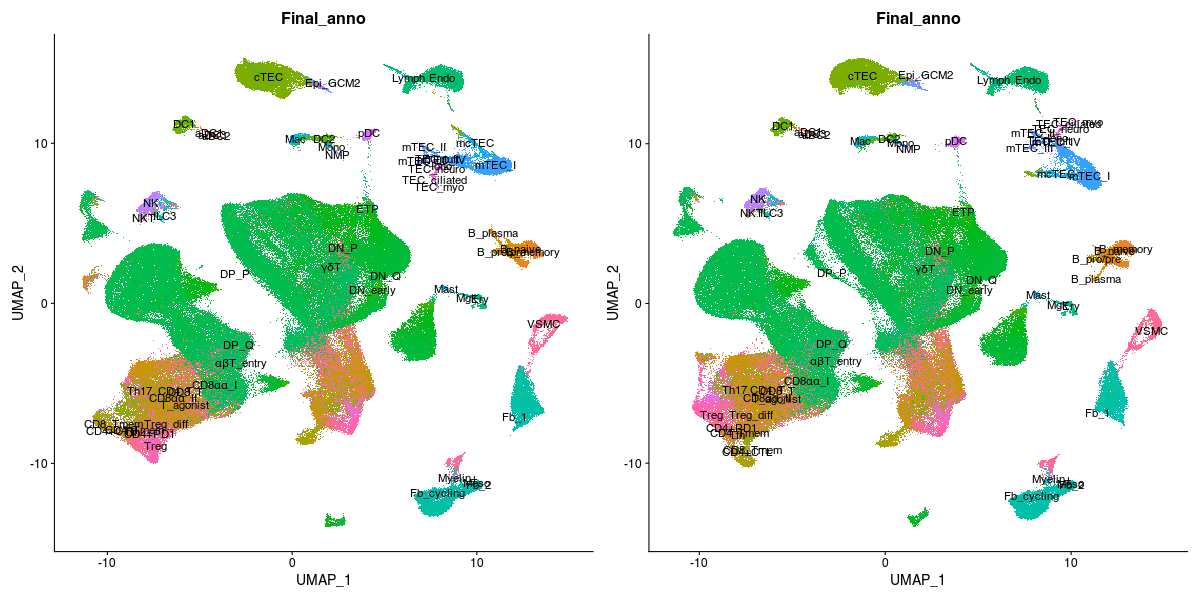

In [5]:
%%R -w 1200 -h 600
library(patchwork)
p1 <- DimPlot(obj1, group.by = "Final_anno", label = T) + NoLegend()
p2 <- DimPlot(obj2, group.by = "Final_anno", label = T) + NoLegend()
p1 + p2

### Variable features

* The variable features were identical!

In [6]:
%%R
print(all.equal(VariableFeatures(obj1), VariableFeatures(obj2)))

[1] TRUE


### Scaled data

* The scaled data were also identical!

In [7]:
%%R
cm1 <- obj1[['RNA']]@scale.data
cm2 <- obj2[['RNA']]@scale.data
cm2 <- cm2[rownames(cm1), ]
print(all.equal(cm1, cm2))

[1] TRUE


In [8]:
%%R
print(identical(cm1, cm2))

[1] TRUE


### PCA

* The PCA outputs were the main source of differences!

In [9]:
%%R
pc1 <- obj1[['pca']]@cell.embeddings
pc2 <- obj2[['pca']]@cell.embeddings
print(all.equal(pc1, pc2))

[1] "Mean relative difference: 0.8369105"


In [10]:
%%R
gc(reset = TRUE)

             used  (Mb) gc trigger    (Mb)   max used  (Mb)
Ncells    2920854   156    4474127   239.0    2920854   156
Vcells 4888712783 37298 7096873133 54144.9 4888712783 37298


## Use modified Seurat

* In the original Seurat, `RunPCA()` use `irlba::irlba()` to calculate singular values. In the modified version, I replaced it with `RSpectra::svds()`.

`pca.results <- RSpectra::svds(A = object, k = npcs, ...)`

`pca.results <- RSpectra::svds(A = t(x = object), k = npcs, ...)`

In [11]:
%%R
obj1 <- readRDS("../output/obj_std_modify_DESKTOP-5EA6KQM_9702.Rds")
obj2 <- readRDS("../output/obj_std_modify_ubuntu_254641.Rds")

In [12]:
%%R
gc(reset = TRUE)

             used    (Mb)  gc trigger     (Mb)   max used    (Mb)
Ncells    2921781   156.1     4474127    239.0    2921781   156.1
Vcells 9252438159 70590.6 13299331982 101465.9 9252438159 70590.6


### UMAP

* The umap outputs were identical! Hurray!

In [13]:
%%R
umap1 <- obj1[['umap']]@cell.embeddings
umap2 <- obj2[['umap']]@cell.embeddings
print(identical(umap1, umap2))

[1] TRUE


R[write to console]: Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

R[write to console]: Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



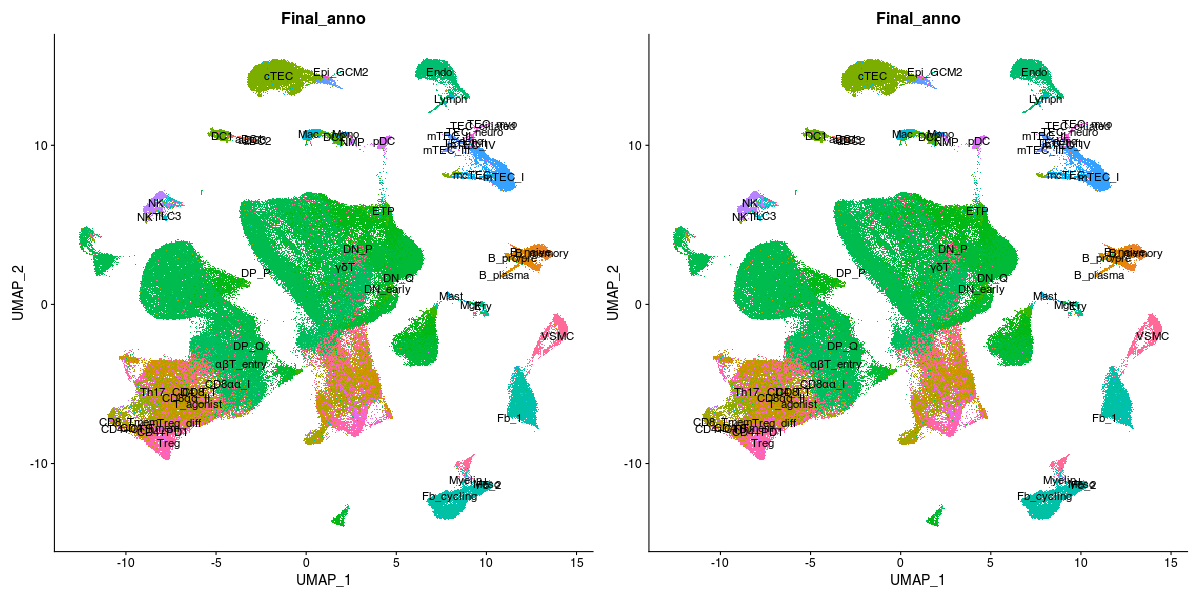

In [14]:
%%R -w 1200 -h 600
library(patchwork)
p1 <- DimPlot(obj1, group.by = "Final_anno", label = T) + NoLegend()
p2 <- DimPlot(obj2, group.by = "Final_anno", label = T) + NoLegend()
p1 + p2

In [15]:
%%R
cm1 <- obj1[['RNA']]@scale.data
cm2 <- obj2[['RNA']]@scale.data
cm2 <- cm2[rownames(cm1), ]
print(identical(cm1, cm2))

[1] TRUE


### PCA

* The PCA outputs also passed `all.equal()`!

In [16]:
%%R
pc1 <- obj1[['pca']]@cell.embeddings
pc2 <- obj2[['pca']]@cell.embeddings
print(all.equal(pc1, pc2))

[1] TRUE


* But did not pass `identical()`! Whatever, it dosen't matter anymore.

In [17]:
%%R
print(identical(pc1, pc2))

[1] FALSE
